# I am just starting Jennifer's coding area

I will be looking into the following areas: 
<ul>Write the code for unsupervised learning</ul>
<ul>PCA, K nearest neighbor, K means, clustering, elbow curve</ul>
<ul>Visualize the classification</ul>



In [1]:
# importing initial libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# grabbing the denver data set
denver_df = pd.read_csv('denver_09.23_listings.csv')

# Add a 'city' column
denver_df['city'] = 'Denver'

# Check dataframe
denver_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,360,https://www.airbnb.com/rooms/360,20230924144343,2023-09-24,city scrape,Guesthouse in Denver · ★4.99 · 2 bedrooms · 2 ...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,...,5.00,4.91,2017-BFN-0002177,f,2,2,0,0,2.87,Denver
1,364,https://www.airbnb.com/rooms/364,20230924144343,2023-09-24,city scrape,Loft in Denver · ★4.85 · 1 bedroom · 1 bed · 1...,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,...,4.65,4.71,NaN,f,1,1,0,0,0.50,Denver
2,590,https://www.airbnb.com/rooms/590,20230924144343,2023-09-24,city scrape,Home in Denver · ★4.85 · 1 bedroom · 1 bed · 1...,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/d84d5bc6-f7cb...,933,...,4.76,4.85,2021-BFN-0000578,f,2,0,2,0,4.04,Denver
3,592,https://www.airbnb.com/rooms/592,20230924144343,2023-09-24,city scrape,Home in Denver · ★4.87 · 1 bedroom · 1 bed · 1...,This room is in the basement. It does not hav...,NaN,https://a0.muscache.com/pictures/ba522ff9-84c9...,933,...,4.81,4.86,2021-BFN-0000578,f,2,0,2,0,0.95,Denver
4,686,https://www.airbnb.com/rooms/686,20230924144343,2023-09-24,city scrape,Home in Denver · ★4.76 · 1 bedroom · 2 beds · ...,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",https://a0.muscache.com/pictures/108112/e6d5d3...,990,...,4.87,4.81,NaN,f,2,0,2,0,1.39,Denver


In [3]:
# Columns to remove - saving the same columns as the group

list_columns_to_remove = ["listing_url", "scrape_id", "last_scraped", "source", "name","neighborhood_overview", "picture_url", "host_url", "host_name", "host_about", "host_thumbnail_url",
                          "host_picture_url", "host_listings_count", "host_total_listings_count", "host_neighbourhood", "host_verifications", "neighbourhood", "neighbourhood_group_cleansed", "bathrooms",
                          "minimum_nights", "maximum_nights",  "maximum_minimum_nights", "minimum_minimum_nights", "minimum_maximum_nights",
                          "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calendar_updated", "calendar_last_scraped",
                          "first_review", "last_review", "license", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms",
                          "calculated_host_listings_count_shared_rooms"]

# Subset dropped columns

denver = denver_df.drop(columns=list_columns_to_remove)
denver.head()

,id,description,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,t,...,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2.87,Denver
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,t,...,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,0.50,Denver
2,590,"Large guest room in my home, where I also live...",933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,t,...,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,4.04,Denver
3,592,This room is in the basement. It does not hav...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,t,...,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,0.95,Denver
4,686,Thanks for visiting my Queen Bed Room site for...,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,t,...,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,1.39,Denver


In [4]:
# remove $ and commas in price column
# since price is critical saving price the same as group
denver['price'] = denver['price'].replace('[\$,]', '', regex=True).astype(float)

denver['price'].head()

0     90.0
1    179.0
2     64.0
3     57.0
4     33.0
Name: price, dtype: float64

In [5]:
# Drop bathrooms_text column as the data has been parsed into new columns
denver = denver.drop(columns='bathrooms_text')
denver.head()

,id,description,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,t,...,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2.87,Denver
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,t,...,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,0.50,Denver
2,590,"Large guest room in my home, where I also live...",933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,t,...,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,4.04,Denver
3,592,This room is in the basement. It does not hav...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,t,...,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,0.95,Denver
4,686,Thanks for visiting my Queen Bed Room site for...,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,t,...,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,1.39,Denver


In [6]:
# Looking at the mean, min, max, and number of responses - raw data
numeric_columns = denver.select_dtypes(include=[int, float]).columns
# Iterate I think I am learning to love this one and it took forever to understand it

summary_data = []

for column in numeric_columns:
    mean_value = round(denver[column].mean(), 2)
    lowest_value = round(denver[column].min(), 2)
    highest_value = round(denver[column].max(), 2)
    reported_values = denver[column].count()

    # Append the following data to the summary table that I created 
    summary_data.append({
        'Column': column,
        'Mean': mean_value,
        'Lowest Value': lowest_value,
        'Highest Value': highest_value,
        'Reported Values': reported_values
    })
    
# Creating a dataframe
summary_table = pd.DataFrame(summary_data)

# I think that I am learning to use this rather than export to excel... think
print(summary_table)

                         Column          Mean  Lowest Value  Highest Value  \
0                            id  3.432328e+17        360.00   9.868614e+17   
1                       host_id  1.472829e+08        589.00   5.384788e+08   
2                      latitude  3.974000e+01         39.62   3.985000e+01   
3                     longitude -1.049800e+02       -105.10  -1.046700e+02   
4                  accommodates  4.140000e+00          1.00   1.600000e+01   
5                      bedrooms  1.960000e+00          1.00   1.000000e+01   
6                          beds  2.230000e+00          1.00   1.800000e+01   
7                         price  2.510300e+02         17.00   9.971300e+04   
8               availability_30  1.046000e+01          0.00   3.000000e+01   
9               availability_60  2.705000e+01          0.00   6.000000e+01   
10              availability_90  4.652000e+01          0.00   9.000000e+01   
11             availability_365  1.834300e+02          0.00   3.

Hold to include the geo spacial information once done

Transforming data so they are all on one scale - trying to decide if I should use the suggestion of square root of the price data then scaling it - ask the group this question

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a list of columns with true/false data to be transformed using OneHotEncoder
true_false = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"]

In [8]:
# Create a list of column names for numeric data types to prepare to use StandardScaler.
num_cols_df = denver.select_dtypes(include = 'number')

num_cols_names = num_cols_df.columns.tolist()

print(num_cols_names)

['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [9]:
# Use list comprehension to remove some of the numeric columns

cols_to_excl = ['id', 'host_id', 'latitude', 'longitude', 'lat1', 'long1']

filtered_col_names = [col for col in num_cols_names if col not in cols_to_excl]

print(filtered_col_names)

['accommodates', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [10]:
# Apply preprocessing steps selectively across different column types using ColumnTransformer from scikit-learn

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), filtered_col_names),
        ('bool', OneHotEncoder(drop='if_binary'), true_false)])

denver_transformed = preprocessor.fit_transform(denver)

denver_transformed

array([[-0.43801535,  0.03664281, -0.14478014, ...,  1.        ,
         1.        ,  0.        ],
       [-0.43801535, -0.88126975, -0.78167012, ...,  1.        ,
         1.        ,  0.        ],
       [-0.43801535,         nan, -0.78167012, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.8221968 , -0.88126975, -0.78167012, ...,  1.        ,
         1.        ,  0.        ],
       [-0.8221968 , -0.88126975, -0.78167012, ...,  1.        ,
         1.        ,  1.        ],
       [-0.8221968 , -0.88126975,  0.49210984, ...,  1.        ,
         1.        ,  0.        ]])

In [11]:
# get transformed feature names

transformed_feature_names = preprocessor.get_feature_names_out()

transformed_feature_names

array(['num__accommodates', 'num__bedrooms', 'num__beds', 'num__price',
       'num__availability_30', 'num__availability_60',
       'num__availability_90', 'num__availability_365',
       'num__number_of_reviews', 'num__number_of_reviews_ltm',
       'num__number_of_reviews_l30d', 'num__review_scores_rating',
       'num__review_scores_accuracy', 'num__review_scores_cleanliness',
       'num__review_scores_checkin', 'num__review_scores_communication',
       'num__review_scores_location', 'num__review_scores_value',
       'num__reviews_per_month', 'bool__host_is_superhost_f',
       'bool__host_is_superhost_t', 'bool__host_is_superhost_nan',
       'bool__host_has_profile_pic_t', 'bool__host_identity_verified_t',
       'bool__has_availability_t', 'bool__instant_bookable_t'],
      dtype=object)

In [12]:
# convert transformed array to DataFrame

denver_transformed_df = pd.DataFrame(denver_transformed, columns=transformed_feature_names)

denver_transformed_df.head(10)

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,num__review_scores_location,num__review_scores_value,num__reviews_per_month,bool__host_is_superhost_f,bool__host_is_superhost_t,bool__host_is_superhost_nan,bool__host_has_profile_pic_t,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t
0,-0.438015,0.036643,-0.14478,-0.089186,-0.631171,-0.002604,0.331489,-0.282730,1.207809,-0.341900,...,0.535952,0.414752,0.385678,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,-0.438015,-0.881270,-0.78167,-0.039893,1.224227,1.246766,1.153714,1.354721,0.299063,-0.665727,...,-0.619848,-0.125094,-0.729467,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,-0.438015,NaN,-0.78167,-0.103586,-0.533518,-0.002604,0.204993,0.384667,6.472605,1.323495,...,-0.256596,0.252798,0.936193,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,-0.822197,NaN,-0.78167,-0.107463,-1.021781,-1.300027,-1.471081,-0.197365,1.099154,-0.619466,...,-0.091482,0.279790,-0.517730,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,-0.822197,NaN,-0.14478,-0.120756,-1.021781,-1.300027,-1.059969,0.811491,1.968389,-0.665727,...,0.106655,0.144829,-0.310699,0.0,1.0,0.0,1.0,1.0,1.0,0.0
5,-0.822197,NaN,-0.78167,-0.084201,-0.338213,-0.915605,-0.490736,-0.484501,0.911479,1.277234,...,0.205723,0.306783,-0.098963,0.0,1.0,0.0,1.0,1.0,1.0,0.0
6,-0.822197,NaN,-0.78167,-0.119648,-0.533518,-1.059763,-0.965097,0.834772,1.770836,-0.573205,...,0.073632,-0.071109,-0.287173,0.0,1.0,0.0,1.0,1.0,1.0,0.0
7,-0.822197,-0.881270,-0.78167,-0.081986,0.150049,0.718186,0.805849,1.269356,1.010255,0.583319,...,0.139678,0.333775,-0.494204,0.0,1.0,0.0,1.0,1.0,1.0,0.0
8,-0.822197,-0.881270,-0.78167,-0.063709,-0.435866,-0.963658,-0.459112,-0.538824,6.028110,0.953407,...,0.040609,0.252798,0.997361,0.0,1.0,0.0,1.0,1.0,1.0,0.0
9,-0.822197,NaN,-0.78167,-0.089186,1.907795,1.583135,1.375082,-0.725074,2.156065,0.305753,...,0.304792,0.441744,-0.056615,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [13]:
# Looking at the mean, min, max, and number of responses - of the already scaled data
numeric_columns = denver_transformed_df.select_dtypes(include=[int, float]).columns
# Iterate I think I am learning to love this one and it took forever to understand it

summary_data = []

for column in numeric_columns:
    mean_value = round(denver_transformed_df[column].mean(), 2)
    lowest_value = round(denver_transformed_df[column].min(), 2)
    highest_value = round(denver_transformed_df[column].max(), 2)
    reported_values = denver_transformed_df[column].count()

    # Append the following data to the summary table that I created 
    summary_data.append({
        'Column': column,
        'Mean': mean_value,
        'Lowest Value': lowest_value,
        'Highest Value': highest_value,
        'Reported Values': reported_values
    })
    
# Creating a dataframe
summary_table = pd.DataFrame(summary_data)

# I think that I am learning to use this rather than export to excel... think
print(summary_table)

                              Column  Mean  Lowest Value  Highest Value  \
0                  num__accommodates  0.00         -1.21           4.56   
1                      num__bedrooms -0.00         -0.88           7.38   
2                          num__beds -0.00         -0.78          10.05   
3                         num__price  0.00         -0.13          55.09   
4               num__availability_30 -0.00         -1.02           1.91   
5               num__availability_60 -0.00         -1.30           1.58   
6               num__availability_90  0.00         -1.47           1.38   
7              num__availability_365  0.00         -1.42           1.41   
8             num__number_of_reviews -0.00         -0.56          13.72   
9         num__number_of_reviews_ltm -0.00         -0.67          12.52   
10       num__number_of_reviews_l30d -0.00         -0.63          17.16   
11         num__review_scores_rating  0.00        -13.97           0.46   
12       num__review_scor

In [ ]:
# because I am still a little bit reliant on excel I am going to extract the dataframe to look at

# Export the DataFrame to an Excel file
# denver_transformed_df.to_excel('scaled_data_denver.xlsx', index=False)

# print
# print('DataFrame is written to Excel successfully.')

Starting the classification code: going to run k-means and PCA but should I run others?  Will update this box as I decide.

In [15]:
# Import the kmeans, PCA module
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [16]:
# I need to make certain that for this analysis there are no nulls 
# I would rather not impute nor dropna but that seems to be what I need to do 
# I will dropna for now and then create a new dataframe for unsupervised learning area

# df_cleaned = df.dropna() -- if I wanted to just drop a bunch and rename into a new dataframe

# creating a probably redundant 'columns_to_use' to include in PCA
columns_to_use = ['num__accommodates',
'num__bedrooms',
'num__beds',
'num__price',
'num__availability_30',
'num__availability_60',
'num__availability_90',
'num__availability_365',
'num__number_of_reviews',
'num__number_of_reviews_ltm',
'num__number_of_reviews_l30d',
'num__review_scores_rating',
'num__review_scores_accuracy',
'num__review_scores_cleanliness',
'num__review_scores_checkin',
'num__review_scores_communication',
'num__review_scores_location',
'num__review_scores_value',
'num__reviews_per_month',
'bool__host_is_superhost_f',
'bool__host_is_superhost_t',
'bool__host_is_superhost_nan',
'bool__host_has_profile_pic_t',
'bool__host_identity_verified_t',
'bool__has_availability_t',
'bool__instant_bookable_t']


# Select the my columns to us which is sort of redundant in this code but sets us up 
# if we want to include more variables in the overall analysis  and reduce it here
df_selected = denver_transformed_df[columns_to_use]

# because I did not want to just blanket dropna above in the full DF I am dropping them now
df_selected_no_null = df_selected.dropna()

# Hold here with the standardscaler if we do not use the transformed data from above
# scaler = StandardScaler()
#df_standardized = pd.DataFrame(scaler.fit_transform(df_selected_no_null), columns=df_selected_no_null.columns)

# Apply PCA - if I have to run standardscaler here again then <df_selected_no_null> would be replaced with <df_standardized>
num_components = min(len(columns_to_use), len(df_selected_no_null) - 1)  
pca = PCA(n_components=num_components)
df_pca_result = pd.DataFrame(pca.fit_transform(df_selected_no_null), columns=[f'PC{i}' for i in range(1, num_components + 1)])

# If I would like to guess at the number of segments run this: 
# pca=PCA(n_components=6)
# df_pca_result = pca.fit_transform(df_selected_no_null)
# df_pca_result[:5]


# Concatenate the PCA results with denver_transformed_df
df_pca_result = pd.concat([denver_transformed_df.reset_index(drop=True), df_pca_result], axis=1)

# Display or use df_pca_results 
print(df_pca_result)

      num__accommodates  num__bedrooms  num__beds  num__price  \
0             -0.438015       0.036643   -0.14478   -0.089186   
1             -0.438015      -0.881270   -0.78167   -0.039893   
2             -0.438015            NaN   -0.78167   -0.103586   
3             -0.822197            NaN   -0.78167   -0.107463   
4             -0.822197            NaN   -0.14478   -0.120756   
...                 ...            ...        ...         ...   
5383           3.787981       1.872468    1.76589    0.211002   
5384          -0.438015       0.954555    0.49211   -0.086417   
5385          -0.822197      -0.881270   -0.78167   -0.061493   
5386          -0.822197      -0.881270   -0.78167   -0.100263   
5387          -0.822197      -0.881270    0.49211   -0.070909   

      num__availability_30  num__availability_60  num__availability_90  \
0                -0.631171             -0.002604              0.331489   
1                 1.224227              1.246766              1.153714 

In [17]:
# Calculate the PCA explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display or use explained_variance_ratio as needed
print(explained_variance_ratio)

[2.24599794e-01 1.64223543e-01 1.51391165e-01 1.25517672e-01
 7.30289390e-02 3.45058512e-02 3.26037608e-02 3.14391110e-02
 3.08494855e-02 2.24471703e-02 1.62043109e-02 1.33970171e-02
 1.17336162e-02 1.05254639e-02 9.97275354e-03 9.71274618e-03
 8.55828148e-03 8.47287273e-03 6.32685911e-03 6.10417986e-03
 5.07336476e-03 1.81016075e-03 9.06416128e-04 4.04779854e-04
 1.90684940e-04 4.42944993e-32]


In [18]:
# summing the explained variance 
explained_denver = explained_variance_ratio.sum()

# Display 
print(explained_denver)

0.9999999999999999


So with 26 different components we can explain 99.9999% of the variance but do we need that many segments?  

In [19]:
df_pca_result.head()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,-0.438015,0.036643,-0.14478,-0.089186,-0.631171,-0.002604,0.331489,-0.282730,1.207809,-0.341900,...,0.797517,-0.419360,0.297799,0.086895,0.038932,-0.013475,0.022833,0.004504,0.002119,-7.083660e-15
1,-0.438015,-0.881270,-0.78167,-0.039893,1.224227,1.246766,1.153714,1.354721,0.299063,-0.665727,...,-0.105557,0.274187,-0.257994,0.015532,0.140206,-0.030143,-0.041447,-0.000878,-0.003327,1.735797e-15
2,-0.438015,NaN,-0.78167,-0.103586,-0.533518,-0.002604,0.204993,0.384667,6.472605,1.323495,...,-0.546998,-0.189731,-0.096530,0.044621,-0.087041,-0.019540,-0.139596,0.016714,0.001066,9.304124e-15
3,-0.822197,NaN,-0.78167,-0.107463,-1.021781,-1.300027,-1.471081,-0.197365,1.099154,-0.619466,...,0.061831,0.338479,0.042275,0.061031,0.153984,-0.030287,0.356181,-0.001211,0.015131,-4.837567e-16
4,-0.822197,NaN,-0.14478,-0.120756,-1.021781,-1.300027,-1.059969,0.811491,1.968389,-0.665727,...,-0.245855,0.312729,-0.049705,0.094406,0.276445,1.195450,-0.017847,-0.010531,0.004308,-1.927141e-15


In [20]:
# Create the denver PCA DataFrame
denver_pca_df = pd.DataFrame(
    df_pca_result,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
             "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24",
             "PC25", "PC26"])

# Review the PCA DataFrame
denver_pca_df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
5383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
denver_pca_no_null = denver_pca_df.dropna()


In [22]:
# Check for missing values 
missing_values = denver_pca_no_null.isnull().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [23]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 26))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(denver_pca_no_null)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,72265.052048
1,2,63935.794078
2,3,56633.541597
3,4,51482.454925
4,5,43319.470138


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

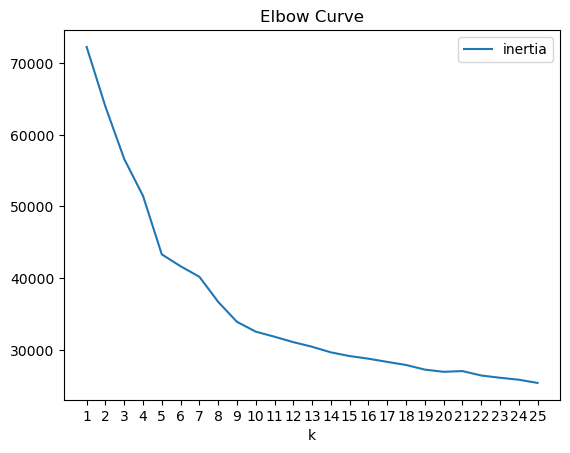

In [24]:
 # Plotting my inertia and k
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [25]:
# Define the model Kmeans model... which sucks because it could be 5 or 7 or 9
model = KMeans(n_clusters=5, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_no_null)

# Make predictions
k_5 = model.predict(denver_pca_no_null)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df = denver_pca_no_null.copy()

# Add a class column with the labels
denver_pca_predictions_df["customer_segments"] = k_5

<Axes: xlabel='PC1', ylabel='PC2'>

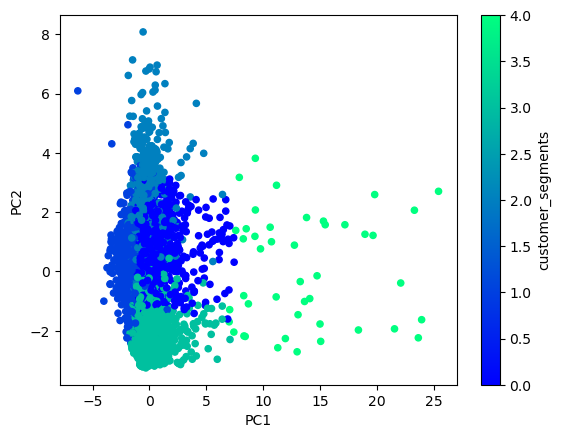

In [26]:
# Plot the clusters
denver_pca_predictions_df.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments",
    colormap='winter')

In [ ]:
# Plot the clusters using price and if it is available 30 days out - I should probably work on this more 
denver_pca_predictions_df.plot.scatter(
    x="num__price",
    y="num__availability_30",
    c="customer_segments",
    colormap='winter')